In this document I will filter to only the abstracts that are from the NSF, to see if we can get a more specific corpus to run our topic model on.

In [1]:
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
#from git/dspg21RnD/wheat_filtration/wheat_filtration import keywords
#from git/dspg21RnD/wheat_filtration/wheat_filtration import filter
#import keywords

In [2]:
#larger dataset

df = pd.read_pickle("../../data/dspg21RnD/smaller-final-dataset.pkl")

In [3]:
df.head()

,original index,PROJECT_ID,ABSTRACT,FY,ORG_COUNT,PI_COUNT,nchar,final_frqwds_removed,PROJECT_TERMS,PROJECT_TITLE,...,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS
0,17608,152242,The multiprotein complex y-secretase proteolyt...,2008,1,1,1402,"[multiprotein, y_secretase, proteolytically_cl...",Active Sites; Affect; Alzheimer's Disease; Am...,STRUCTURE OF SIGNAL PEPTIDE PEPTIDASE,...,BOSTON,MA,021156110,UNITED STATES,12/1/2007,1/1/2008,93.866,2008,3483.0,NaN
1,111864,190316,DESCRIPTION (provided by applicant): The Kis...,2008,1,1,2553,"[kissl, gene, encode, peptide, kisspeptin, bin...",Affect; Animal Model; Axon; Behavior; Behavio...,ROLE OF KISS1 NEURONS IN THE SEASONAL AND CIRC...,...,SEATTLE,WA,981959472,UNITED STATES,9/1/2008,1/1/2009,93.865,2008,39175.0,NaN
2,22052,154213,DESCRIPTION (provided by applicant): The objec...,2008,1,1,1414,"[biophysical, basis, thermodynamics_kinetic, m...",Agreement; Antibodies; base; Binding; Biochem...,CARBONIC ANHYDRASE AS A MODEL TO UNDERSTAND DI...,...,CAMBRIDGE,MA,021385319,UNITED STATES,1/2/2008,1/1/2009,93.859,2008,49646.0,NaN
3,35004,159362,Obesity is the cause of many adverse pregnancy...,2008,1,1,1545,"[obesity, adverse_pregnancyoutcome, great, hea...",African; Analysis of Variance; Asians; Birth;...,OBESITY ON VAGAL TONE AND HBA1C DURING PREGNANCY,...,HOUSTON,TX,770305400,UNITED STATES,4/1/2008,1/1/2009,93.361,2008,20406.0,NaN
4,371628,594482,Local potato advisory groups have expressed in...,2010,1,1,271,"[local, potato, advisory, express, interest, m...",cost; Health; interest; Manure; Parasitic nem...,PLANT-PARASITIC NEMATODE MANAGEMENT AS A COMPO...,...,CORVALLIS,OR,97331,UNITED STATES,NaN,NaN,10.203,2010,NaN,NaN


NSF only:

In [4]:
#filter to NSF

nsf = df[df["AGENCY"] == "NSF"]

In [5]:
df.shape

(690814, 31)

In [6]:
nsf.shape

(121715, 31)

In [7]:
df["AGENCY"].unique()

array(['NIH', 'NIFA', 'DVBIC', 'NASA', 'ARS', 'VA', 'CDMRP', 'EPA', 'IES',
       'ALLCDC', 'ACF', 'AHRQ', 'NIDILRR', 'FS', 'CCCRP', 'NSF', 'FDA',
       'CNRM', nan], dtype=object)

In [8]:
nsf["AGENCY"].unique()

array(['NSF'], dtype=object)

In [9]:
nsf.head()

,original index,PROJECT_ID,ABSTRACT,FY,ORG_COUNT,PI_COUNT,nchar,final_frqwds_removed,PROJECT_TERMS,PROJECT_TITLE,...,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS
1925,13759,103782,Proposal Title: 2006 Minority Faculty Developm...,2008,1,1,3014,"[title, principal, barabinoinstitution, georgi...",Achievement; Address; Administrator; Advisory...,2006 MINORITY FACULTY DEVELOPMENT WORKSHOP,...,ATLANTA,GA,30332-0420,UNITED STATES,NaN,NaN,47.041,2008,37738.0,NaN
1927,13714,103211,This workshop will provide a unique platform f...,2008,1,1,1175,"[workshop, unique, platform, expert, cell, mol...",Area; Biology; Biomechanics; Biomedical Engin...,"WORKSHOP: THE CELL AS A MACHINE: MECHANO-, CON...",...,CHAMPAIGN,IL,61820-7406,UNITED STATES,NaN,NaN,47.041,2008,44635.0,NaN
1958,11830,101825,AbstractZhengThe proposal is for partial fundi...,2008,1,1,1488,"[partial, funding, th, southeastern, meeting, ...",abstracting; Back; experience; Faculty; Fundi...,THE 24TH SOUTHEASTERN ANALYSIS MEETING AND SHA...,...,NASHVILLE,TN,37240-7749,UNITED STATES,NaN,NaN,47.049,2008,25000.0,NaN
1962,11834,101831,The 50th Annual Maize Genetics Conference will...,2008,1,1,1083,"[50th_annual, maize, genetics, conference, hol...",career; Communities; cost; District of Columb...,50TH ANNUAL MAIZE GENETICS CONFERENCE TO BE HE...,...,COLUMBIA,MO,65211-1230,UNITED STATES,NaN,NaN,47.074,2008,69750.0,NaN
1995,4372,94089,"The purpose of this workshop, to be held April...",2008,1,1,1545,"[purpose, workshop, hold, april, 2008, troy_mi...",Academia; Address; Automobiles; Communities; ...,NATIONAL WORKSHOP ON HIGH-CONFIDENCE AUTOMOTIV...,...,PITTSBURGH,PA,15213-3890,UNITED STATES,NaN,NaN,47.041,2008,NaN,NaN


In [10]:
nsf["CFDA_CODE"].unique()

array(['47.041', '47.049', '47.074', '47.070', '47.050', '47.078',
       '47.075', '47.079', '47.076', '47.080', '47.082', '47.081', nan,
       '47.083'], dtype=object)

In [11]:
counts_cfda = nsf["PROJECT_ID"].groupby(nsf["CFDA_CODE"]).count()

In [12]:
import matplotlib.pyplot as plt

In [13]:
counts_cfda

CFDA_CODE
47.041    23932
47.049    25432
47.050    12686
47.070    16416
47.074    12994
47.075    10946
47.076     9877
47.078      976
47.079     2627
47.080      853
47.081       54
47.082     4712
47.083      164
Name: PROJECT_ID, dtype: int64

CFDA = 47.070

In [14]:
# filter where cfda = 47.070

nsf_csci = nsf[nsf["CFDA_CODE"] == "47.070"]

In [15]:
nsf_csci.head()

,original index,PROJECT_ID,ABSTRACT,FY,ORG_COUNT,PI_COUNT,nchar,final_frqwds_removed,PROJECT_TERMS,PROJECT_TITLE,...,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS
1996,11849,101844,This symposium is a premiere forum for researc...,2008,1,1,697,"[symposium, premiere, forum, interaction, comp...",Arts; Award; Collaborations; Communities; Com...,SUPPORT FOR THE THIRTEENTH INTERNATIONAL CONFE...,...,CHAMPAIGN,IL,61820-7406,UNITED STATES,NaN,NaN,47.070,2008,4651.0,NaN
2067,11747,101739,This award is to the Computer Research Associa...,2008,1,1,2638,"[award, computer, association, cra, coordinate...",Address; Architecture; Award; base; Collabora...,THE 2007 FIND PIS MEETING,...,WASHINGTON,DC,20036-0000,UNITED STATES,NaN,NaN,47.070,2008,29940.0,NaN
2187,12250,102249,IIS-0808994PI: Jonathan FurnerUniversity of Ca...,2008,1,1,1682,"[iis, pi, furneruniversity, california_los, an...",Arts; Award; California; Development; Dimensi...,WORKSHOP: I-CONFERENCE DOCTORAL RESEARCH COLLO...,...,LOS ANGELES,CA,90095-1406,UNITED STATES,NaN,NaN,47.070,2008,25859.0,NaN
2234,12405,102404,ABSTRACT0812795Vijay K. VaishnaviGa State U Re...,2008,1,1,574,"[vaishnaviga, res, fdnthis, seek, funding, enc...",computer science; design; Discipline; Funding...,STUDENT PARTICIPATION IN 3RD INTERNATIONAL CON...,...,ATLANTA,GA,30303-3999,UNITED STATES,NaN,NaN,47.070,2008,9000.0,NaN
2235,12451,102448,The 3rd International Conference on emerging N...,2008,1,1,3025,"[3rd, international, conference, emerge, netwo...",Award; base; career; Commit; Communication; C...,STUDENT TRAVEL SUPPORT FOR CONEXT 2007 CONFERENCE,...,MADISON,WI,53715-1218,UNITED STATES,NaN,NaN,47.070,2008,10875.0,NaN


In [16]:
nsf_csci.shape

(16416, 31)

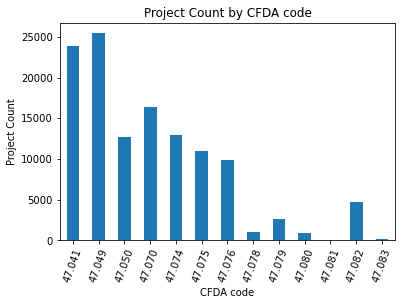

In [17]:
counts_cfda.plot(kind = "bar")
plt.xticks(rotation=70) 
plt.xlabel('CFDA code')  
plt.ylabel('Project Count') 
plt.title('Project Count by CFDA code') 
plt.savefig("count_cfda_nsf.png")

In [18]:
#start with the core terms from the OECD paper
core_terms = ["adaboost","artificial intelligence","artificial neural network","back propagation"
,"back propagation neural network","computational intelligence","computer vision"
,"convolutional neural network","deep belief network","deep convolutional neural network"
,"deep learn","deep neural network","elman network","elman neural network"
,"expert system","fee forward neural network","inference engine","machine intelligence"
,"machine learn","machine translation","machine vision","multilayer neural network"
,"natural language process","perceptron","random forest","rbf neural network","recurrent neural network"
,"self organize map","spike neural network","supervise learn","support vector machine"
,"svm classifier","unsupervised learn","artificial_intelligence","artificial_neural_network","back_propagation"
,"back_propagation_neural_network","computational_intelligence","computer_vision"
,"convolutional_neural_network","deep_belief_network","deep_convolutional_neural_network"
,"deep_learn","deep_neural_network","elman_network","elman_neural_network"
,"expert_system","fee_forward_neural_network","inference_engine","machine_intelligence"
,"machine_learn","machine_translation","machine_vision","multilayer_neural_network"
,"natural_language_process","random_forest","rbf_neural_network","recurrent_neural_network"
,"self_organize_map","spike_neural_network","supervise_learn","support_vector_machine"
,"svm_classifier","unsupervised_learn", "machine_learning"]

In [19]:
tokens = nsf["final_frqwds_removed"]

text = [] # text will contain the processed tokens in string form (1 string per abstract)


for abstract in tokens:
    text.append(" ".join(abstract))
    
text = pd.Series(text)

In [20]:
# TRY TOPIC MODELING WITH LDA

lda_vectorizer = CountVectorizer(max_df=0.6, min_df=20)
#this is our way to filter out words that don't appear enough, and those that appear way too often (we want the middle set of terms)
#^this filters the size of our matrix

lda_dtm = lda_vectorizer.fit_transform(text)
#text = our abstract text, right in the dataframe
#fits our doc-term matrix to our specific text 
#this is the standard for scikit-learn
 


In [44]:
#functions for creating a topic dictionary, viewing the topics in the topic model,
#and selecting only the relevant topics based on a threshold and our keyword list.


def topic_dictionary(lda_model, lda_vectorizer, top_n=10):
    topic_ls = {} #append keys, append the values
    
    
    for idx, topic in enumerate(lda_model.components_):  # loop through each row of H.  idx = row index.  topic = actual row

        print_list = [(lda_vectorizer.get_feature_names()[i], topic[i])  
                        for i in topic.argsort()[:-top_n - 1:-1]]
        topic_ls[idx] = print_list

    return topic_ls

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):  # loop through each row of H.  idx = row index.  topic = actual row
        print("\nTopic %d:" % (idx))
            
        print_list = [(vectorizer.get_feature_names()[i], topic[i])  
                        for i in topic.argsort()[:-top_n - 1:-1]]
        for item in print_list:
            print(item)
            
            
def relevant_topics(topic_dictionary, keyword_list, threshold = 1):
    """returns a list of the topics which contain a threshold % of the
    relevant words in the keyword list"""
    relevant_topic = []
    for key in topic_dictionary:
        relevant_words = 0
        for i in range(len(topic_dictionary[key])):
            if topic_dictionary[key][i][0] in keyword_list:
                relevant_words += 1
            else: relevant_words += 0
        if (relevant_words) >= threshold :#/ len(topic_dictionary[key]) >= threshold :
            relevant_topic.append(key)
    return relevant_topic  

def super_keywords(keyword_list, relevant_topic_list, topic_dictionary):
    superkeyword = keyword_list
    for key in topic_dictionary:
        if key in relevant_topic_list:
            for i in range(len(topic_dictionary[key])):
                superkeyword.append(topic_dictionary[key][i][0])
    return superkeyword

Now, trying a 75 topic model on the NSF corpus.

In [31]:
# create model

num_topics = 75
lda_model_75 = LatentDirichletAllocation(n_components=num_topics, doc_topic_prior = 1/num_topics, 
                                      topic_word_prior=0.1, n_jobs=29, random_state = 0)

doc_top_dist_75 = lda_model_75.fit_transform(lda_dtm)
top_term_dist_75 = lda_model_75.components_


In [32]:
nsf_dic75 = topic_dictionary(lda_model_75, lda_vectorizer, 50)

In [34]:
#print_topics(lda_model_75, lda_vectorizer, 10)

In [36]:
nsf_dic75[59][0:10]

[('performance', 7800.409371582714),
 ('computing', 7343.015099344587),
 ('software', 5958.477080531771),
 ('architecture', 4528.284629600627),
 ('memory', 4122.096325295902),
 ('hardware', 4113.827991459793),
 ('computer', 4029.246460657543),
 ('parallel', 3489.1940486052117),
 ('programming', 2824.0297297148327),
 ('level', 2686.914908740683)]

In [38]:
nsf_dic75[10][0:10]

[('user', 9067.0361735743),
 ('software', 6199.237384664498),
 ('robot', 5763.631364107451),
 ('task', 4509.956711010427),
 ('human', 4080.6550480123565),
 ('search', 2557.349311948212),
 ('web', 2077.8788977733784),
 ('code', 2009.8207692561439),
 ('robotics', 1861.684610586474),
 ('enable', 1649.5467258057824)]

In [39]:
nsf_dic75[2][0:10]

[('computer', 10797.920295914659),
 ('computational', 9449.366877402887),
 ('science', 9304.498089473023),
 ('software', 6552.863237372862),
 ('computing', 6460.395668127229),
 ('open', 3744.741382892853),
 ('create', 3533.82968544871),
 ('scientific', 3454.934270348386),
 ('enable', 3286.0033656274363),
 ('technology', 2993.4955403200884)]

In [40]:
nsf_dic75[65][0:10]

[('algorithm', 11967.831495315058),
 ('statistical', 7918.781122632267),
 ('optimization', 6197.971995828134),
 ('framework', 5506.894508569184),
 ('computational', 4249.287311182363),
 ('modeling', 4226.22289767596),
 ('uncertainty', 4046.8904162257286),
 ('methodology', 3891.579111367414),
 ('parameter', 3307.839982719072),
 ('estimation', 3127.9878302988445)]

Now, trying with 100

In [14]:
# create model

num_topics = 100
lda_model_100 = LatentDirichletAllocation(n_components=num_topics, doc_topic_prior = 1/num_topics, 
                                      topic_word_prior=0.1, n_jobs=39, random_state = 0)

doc_top_dist_100 = lda_model_100.fit_transform(lda_dtm)
top_term_dist_100 = lda_model_100.components_


In [15]:
nsf_dic100 = topic_dictionary(lda_model_100, lda_vectorizer, 50)

In [1]:
#print_topics(lda_model_100, lda_vectorizer, 10)

In [ ]:
# create model

num_topics = 150
lda_model_150 = LatentDirichletAllocation(n_components=num_topics, doc_topic_prior = 1/num_topics, 
                                      topic_word_prior=0.1, n_jobs=39, random_state = 0)

doc_top_dist_150 = lda_model_150.fit_transform(lda_dtm)
top_term_dist_150 = lda_model_150.components_


In [14]:
# create model

num_topics = 200
lda_model_200 = LatentDirichletAllocation(n_components=num_topics, doc_topic_prior = 1/num_topics, 
                                      topic_word_prior=0.1, n_jobs=39, random_state = 0)

doc_top_dist_200 = lda_model_200.fit_transform(lda_dtm)
top_term_dist_200 = lda_model_200.components_


In [15]:
nsf_dic200 = topic_dictionary(lda_model_200, lda_vectorizer, 50)

In [20]:
#print_topics(lda_model_200, lda_vectorizer, 10)

Topic 2, topic 126 are AI in the 200-topic model

Doing a 30-topic model on the Computer and Information Science and Engineering subset of the NSF abstracts.  There are only 16k abstracts

In [19]:
nsf_csci.shape

(16416, 31)

In [48]:
tokens = nsf_csci["final_frqwds_removed"]

text = [] # text will contain the processed tokens in string form (1 string per abstract)


for abstract in tokens:
    text.append(" ".join(abstract))
    
text = pd.Series(text)

In [49]:
# TRY TOPIC MODELING WITH LDA

lda_vectorizer = CountVectorizer(max_df=0.6, min_df=20)
#this is our way to filter out words that don't appear enough, and those that appear way too often (we want the middle set of terms)
#^this filters the size of our matrix

lda_dtm = lda_vectorizer.fit_transform(text)
#text = our abstract text, right in the dataframe
#fits our doc-term matrix to our specific text 
#this is the standard for scikit-learn
 


In [23]:
# create model

num_topics = 30
lda_model_30 = LatentDirichletAllocation(n_components=num_topics, doc_topic_prior = 1/num_topics, 
                                      topic_word_prior=0.1, n_jobs=39, random_state = 0)

doc_top_dist_30 = lda_model_30.fit_transform(lda_dtm)
top_term_dist_30 = lda_model_30.components_

In [26]:
nsfcs_dic30 = topic_dictionary(lda_model_30, lda_vectorizer, 50)

In [32]:
#print_topics(lda_model_30, lda_vectorizer, 10)

In [33]:
nsfcs_dic30[1][0:10]

[('language', 2452.516498079181),
 ('text', 1006.3110880040451),
 ('natural', 883.2785202163582),
 ('semantic', 678.091536979773),
 ('web', 671.0009600522898),
 ('document', 637.2073611739268),
 ('speech', 614.3428326228551),
 ('search', 594.220703737375),
 ('processing', 586.6491803139464),
 ('user', 570.2484549409298)]

In [34]:
nsfcs_dic30[13][0:10]

[('algorithm', 4208.608840558305),
 ('theory', 2840.2056846080322),
 ('computational', 1507.4670769526215),
 ('optimization', 1461.9417870086677),
 ('theoretical', 1331.815462417093),
 ('science', 1237.3574608835675),
 ('statistical', 1131.9209130553863),
 ('complexity', 1124.2932616654368),
 ('computer', 1026.237725446531),
 ('mathematical', 987.5560658641932)]

In [35]:
nsfcs_dic30[25][0:10]

[('robot', 3359.417680996466),
 ('human', 2577.4069159674955),
 ('environment', 1486.4579233364861),
 ('robotics', 1063.4565352290679),
 ('vehicle', 854.4045499561456),
 ('task', 816.9763273919507),
 ('robotic', 785.7580801377391),
 ('interaction', 758.42760293913),
 ('planning', 698.9661202034138),
 ('team', 665.1657482487662)]

In [36]:
nsfcs_dic30[28][0:10]

[('task', 1398.059958695678),
 ('learn', 1363.6580431289515),
 ('learning', 1256.710458306348),
 ('algorithm', 1097.6038041965683),
 ('decision', 1059.8277742272232),
 ('agent', 1013.1478363351598),
 ('machine_learning', 831.3305711952041),
 ('domain', 793.3176163212187),
 ('framework', 660.3604621222418),
 ('real', 632.9863435219587)]

In [28]:
num_topics = 50
lda_model_50 = LatentDirichletAllocation(n_components=num_topics, doc_topic_prior = 1/num_topics, 
                                      topic_word_prior=0.1, n_jobs=39, random_state = 0)

doc_top_dist_50 = lda_model_50.fit_transform(lda_dtm)
top_term_dist_50 = lda_model_50.components_

In [22]:
#print_topics(lda_model_50, lda_vectorizer, 10)

25, 28, 48

In [50]:
num_topics = 100
lda_model_100 = LatentDirichletAllocation(n_components=num_topics, doc_topic_prior = 1/num_topics, 
                                      topic_word_prior=0.1, n_jobs=39, random_state = 0)

doc_top_dist_100 = lda_model_100.fit_transform(lda_dtm)
top_term_dist_100 = lda_model_100.components_

In [51]:
#print_topics(lda_model_100, lda_vectorizer, 10)

19, 52, 54, 76, 79, 86, 97

In [62]:
nsfcs_dic100 = topic_dictionary(lda_model_100, lda_vectorizer, 50)

In [53]:
nsfcs_dic100[19][0:15]

[('graph', 2462.2972841025025),
 ('mining', 660.3066246687682),
 ('algorithm', 559.8030180085358),
 ('pattern', 289.113236307129),
 ('edge', 227.46269296479247),
 ('real', 197.20648487656408),
 ('domain', 137.2843781269611),
 ('anomaly', 134.39008641464014),
 ('social', 134.07527965190465),
 ('analytics', 130.93391842624442),
 ('network', 129.21605419748968),
 ('irregular', 127.48866737124281),
 ('node', 119.53130373091832),
 ('world', 108.44226220914099),
 ('processing', 105.90993203052052)]

In [54]:
nsfcs_dic100[52][0:15]

[('task', 1667.5998674114032),
 ('robot', 1205.2733479871963),
 ('human', 667.5030619334059),
 ('planning', 651.9088761238436),
 ('motion', 547.4441514047675),
 ('action', 545.034947422538),
 ('autonomous', 524.3019424622092),
 ('manipulation', 508.5319744841163),
 ('environment', 507.2456930949452),
 ('robotic', 475.71316628732137),
 ('algorithm', 413.94966228240946),
 ('enable', 288.71012963912256),
 ('robotics', 283.509516724759),
 ('agent', 279.35572225212815),
 ('learn', 228.39561697061572)]

In [55]:
nsfcs_dic100[54][0:15]

[('robot', 400.84901342166),
 ('motor', 286.6005205219227),
 ('hand', 285.2745892318118),
 ('human', 223.16141139120617),
 ('robotic', 218.12729661842502),
 ('movement', 212.42065577045534),
 ('force', 210.76716086016995),
 ('arm', 173.53051174420514),
 ('environment', 145.77342117895245),
 ('robotics', 118.73722282530731),
 ('assistive', 116.94376450869532),
 ('pis', 115.4334127330146),
 ('object', 114.63801914889936),
 ('walk', 110.31475543395928),
 ('gait', 107.15655344429868)]

In [56]:
nsfcs_dic100[76][0:15]

[('algorithm', 1240.1942831168114),
 ('computational', 747.3377107663017),
 ('solution', 602.5737568888037),
 ('numerical', 435.97774869387007),
 ('optimization', 415.7614482832579),
 ('solving', 403.99019929766405),
 ('linear', 384.42221155603283),
 ('computer', 333.66799399344507),
 ('solve', 333.16176886312076),
 ('science', 333.07163175650385),
 ('mathematical', 280.08281954069486),
 ('engineering', 266.6018952432416),
 ('solver', 251.9626318867719),
 ('matrix', 243.3638556521591),
 ('equation', 234.6849094327548)]

In [57]:
nsfcs_dic100[79][0:15]

[('language', 2144.887478365342),
 ('speech', 1131.1117051254016),
 ('natural', 599.6745213872944),
 ('processing', 479.1224783524312),
 ('linguistic', 447.9412757359252),
 ('text', 444.0013130334293),
 ('recognition', 415.10750001393774),
 ('annotation', 323.56805380072103),
 ('translation', 299.85525376117687),
 ('human', 271.64202926108186),
 ('automatic', 261.98584160629355),
 ('word', 260.42863801789616),
 ('speaker', 236.27280804289842),
 ('audio', 227.33951009200655),
 ('technology', 208.12115178435536)]

In [58]:
nsfcs_dic100[86][0:15]

[('human', 3485.8322547179414),
 ('robot', 1777.589081373325),
 ('interaction', 699.6492100943879),
 ('robotics', 657.2793637927633),
 ('environment', 393.39388202687496),
 ('team', 382.00487124254914),
 ('people', 218.92423623762568),
 ('machine', 207.63928741334777),
 ('task', 203.30837221711272),
 ('cognitive', 189.08865713300628),
 ('operator', 176.57447472975485),
 ('interact', 165.88041193385916),
 ('intelligent', 151.45301088124222),
 ('robotic', 149.51433987674383),
 ('collaborative', 140.59228383853102)]

In [59]:
nsfcs_dic100[97][0:15]

[('learning', 1753.425587928131),
 ('deep', 1206.3295947990032),
 ('learn', 977.393948584993),
 ('machine_learning', 449.65095379314283),
 ('neural', 411.89155081104036),
 ('ai', 273.8011831510943),
 ('machine', 266.3093513909305),
 ('intelligence', 210.80992532602272),
 ('intelligent', 199.38004638266955),
 ('network', 196.9212463435522),
 ('algorithm', 192.03032816490338),
 ('artificial_intelligence', 167.46230118906087),
 ('reinforcement', 167.4450670234159),
 ('architecture', 166.82888205136672),
 ('advance', 118.04581497835483)]

In [63]:
relevant_topics(nsfcs_dic100, core_terms, threshold = 1)

[15, 23, 28, 87, 97]

In [64]:
nsfcs_dic100[15][0:15]

[('health', 2116.0966517857764),
 ('patient', 1244.7450881968607),
 ('care', 819.0339929744473),
 ('medical', 676.7615454630422),
 ('healthcare', 623.2943716504553),
 ('clinical', 556.9735215587403),
 ('technology', 223.57570780885894),
 ('individual', 210.91677664812553),
 ('cost', 207.34347137206652),
 ('population', 190.37128252654986),
 ('hospital', 184.70507724109828),
 ('medicine', 181.99000710864803),
 ('record', 177.60667439014955),
 ('personalize', 171.30428620903686),
 ('family', 170.9999364264955)]

In [65]:
nsfcs_dic100[86][0:15]

[('human', 3485.8322547179414),
 ('robot', 1777.589081373325),
 ('interaction', 699.6492100943879),
 ('robotics', 657.2793637927633),
 ('environment', 393.39388202687496),
 ('team', 382.00487124254914),
 ('people', 218.92423623762568),
 ('machine', 207.63928741334777),
 ('task', 203.30837221711272),
 ('cognitive', 189.08865713300628),
 ('operator', 176.57447472975485),
 ('interact', 165.88041193385916),
 ('intelligent', 151.45301088124222),
 ('robotic', 149.51433987674383),
 ('collaborative', 140.59228383853102)]